In [2]:
import sqlite3

# Conectar a la base de datos SQLite
db_file = "DRUG_DB.db"  # Reemplaza con el nombre de tu archivo de base de datos
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Obtener la lista de tablas en la base de datos
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]

# Actualizar las unidades en cada tabla
for table_name in tables:
    cursor.execute(f"""SELECT DISTINCT Parameter FROM "{table_name}";""")
    for row in cursor.fetchall():
        parameter = row[0]
        cursor.execute(f"""SELECT Units FROM "{table_name}" WHERE Parameter = "{parameter}";""")
        units = [row[0] for row in cursor.fetchall()]
        
        # Actualizar las unidades en la base de datos
        new_units = [unit.replace('[', '').replace(']', '').replace(' ','').strip() for unit in units]
        for old_unit, new_unit in zip(units, new_units):
            cursor.execute(f"""
                UPDATE "{table_name}"
                SET Units = "{new_unit}"
                WHERE Parameter = "{parameter}" AND Units = "{old_unit}";
            """)
        conn.commit()

# Cerrar la conexión a la base de datos
conn.close()

print("Actualización de unidades completa.")


Actualización de unidades completa.


In [1]:
import sqlite3

# Conectar a la base de datos SQLite
db_file = "DRUG_DB.db"  # Reemplaza con el nombre de tu archivo de base de datos
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Obtener la lista de tablas en la base de datos
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]

# Diccionario para almacenar las unidades únicas por parámetro
unique_units_by_parameter = {}

# Recorrer todas las tablas y obtener las unidades únicas para cada parámetro
for table_name in tables:
    cursor.execute(f"""SELECT DISTINCT Parameter FROM "{table_name}";""")
    for row in cursor.fetchall():
        parameter = row[0]
        query = f"""SELECT DISTINCT Units FROM "{table_name}" WHERE Parameter = '{parameter}';"""
        cursor.execute(query)
        units = [row[0] for row in cursor.fetchall()]
        if parameter in unique_units_by_parameter:
            unique_units_by_parameter[parameter].extend(units)
        else:
            unique_units_by_parameter[parameter] = units

# Imprimir las unidades únicas por parámetro
for parameter, units in unique_units_by_parameter.items():
    unique_units = list(set(units))
    print(f"Parámetro: {parameter}")
    print(f"Unidades únicas: {len(unique_units)}")
    print(unique_units)

# Cerrar la conexión a la base de datos
conn.close()


Parámetro: halflife
Unidades únicas: 87
['', 'μM', '[g] / [h·l]', '[l] / [h]', 'ms', '1/[min]', 'week', '[eq·ng] / [mg]', '[d·ng] / [ml]', '(h)·h', '[h·ng] / [mg·ml]', '[l] / [(m)^2·h]', '1/[d]', '1', 'd·degree', '[μM] / [h·l]', '[g·μg] / [ml]', 'd', '1/[h]', '[h] / [year]', '[l] / [h·kg]', '[μg] / [h·ml]', '[ml] / [min]', '[ml] / [kg]', '∼24h', '[h·ng] / [ml]', '[l] / [70·h·kg]', '1/[hours]', 'h', '[l] / [70·kg]', '[ml] / [(m)^2·min]', '[min·μg] / [ml]', '[l] / [kg·min]', 'p', 'seconds', '[l] / [min]', 'weeks', '[h·μg] / [ml]', '[μg] / [l]', 'h·μM', '[μg] / [ml]', 'a', '%', 'min', '[l] / [h·m2]', 'd·h·s', '[ng] / [h·ml]', 'center', '[h·μg] / [l]', 'hs', '[l] / [kg]', 'month', 'minuts', 'μg', '[pM] / [8]', 'wk', 'l', '[eq·ng] / [ml]', 'μl', '[μM] / [l]', '[ng] / [m]', '[h·l] / [m(2]', '[ml] / [h)·kg]', 'years', 'mn', 'yr', '[h] / [d]', '[mg] / [l]', '[ml] / [d·kg]', '[ml] / [h·kg]', '[ml-h] / [cfu]', '[ml] / [kg·min]', '[d·μg] / [ml]', '[h] / [(kg)^0]', '[h·μg] / [g]', '[h·mg] / [l]', 

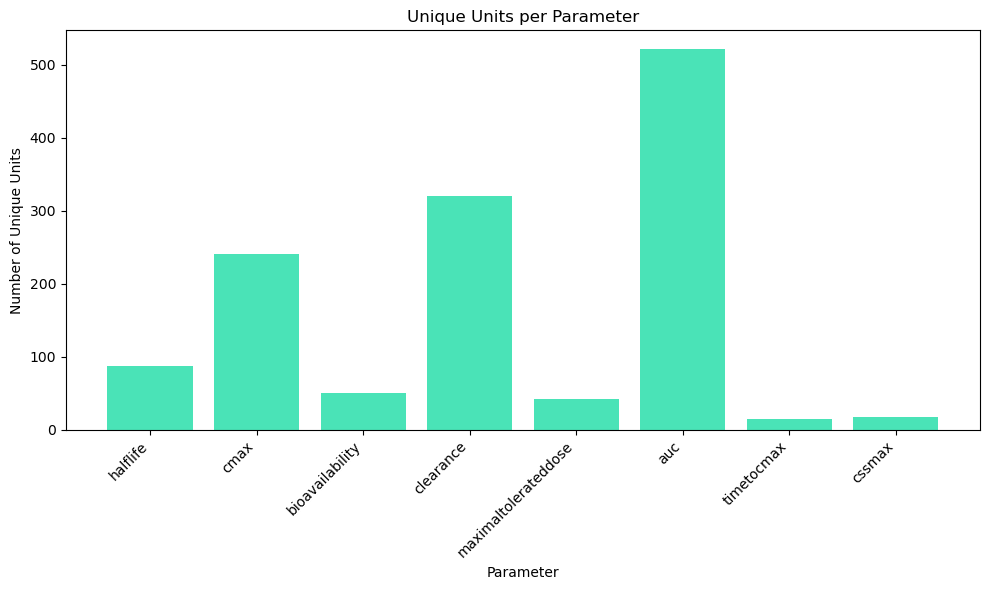

In [9]:
import matplotlib.pyplot as plt
parameters = list(unique_units_by_parameter.keys())
unique_unit_counts = [len(set(units)) for units in unique_units_by_parameter.values()]

# Colores
secondary_color= '#6C4AF8'
main_color= '#4AE3B7'

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(parameters, unique_unit_counts, color=[main_color if count > 1 else secondary_color for count in unique_unit_counts])

# Configurar títulos y etiquetas en inglés
plt.title('Unique Units per Parameter')
plt.xlabel('Parameter')
plt.ylabel('Number of Unique Units')

# Mostrar el gráfico
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [6]:
import sqlite3

# Abre un archivo en modo de escritura para el registro
with open('log.txt', 'w') as log_file:

    # Conectar a la base de datos SQLite
    db_file = "DRUG_DB_applied.db"  # Reemplaza con el nombre de tu archivo de base de datos
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Obtener la lista de tablas en la base de datos
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [row[0] for row in cursor.fetchall()]

    # Diccionario para almacenar las unidades únicas por parámetro
    unique_units_by_parameter = {}

    # Recorrer todas las tablas y obtener las unidades únicas para cada parámetro
    for table_name in tables:
        cursor.execute(f"""SELECT DISTINCT Parameter FROM "{table_name}";""")
        for row in cursor.fetchall():
            parameter = row[0]
            query = f"""SELECT Units, COUNT(*) FROM "{table_name}" WHERE Parameter = '{parameter}' GROUP BY Units;"""
            cursor.execute(query)
            unit_counts = cursor.fetchall()
            if parameter in unique_units_by_parameter:
                for unit, count in unit_counts:
                    existing_count = unique_units_by_parameter[parameter].get(unit, 0)
                    unique_units_by_parameter[parameter][unit] = existing_count + count
            else:
                unique_units_by_parameter[parameter] = dict(unit_counts)

    # Imprimir el conteo de unidades únicas por parámetro y escribirlo en el archivo log
    for parameter, unit_counts in unique_units_by_parameter.items():
        sorted_units = sorted(unit_counts.items(), key=lambda x: x[1], reverse=True)
        log_file.write(f"Parámetro: {parameter}\n")
        for unit, count in sorted_units:
            log_entry = f"Unidad: {unit} - Repeticiones: {count}\n"
            log_file.write(log_entry)
            print(log_entry, end='')  # También se imprime en la consola

    # Cerrar la conexión a la base de datos
    conn.close()

print("Registro completo. Los resultados se encuentran en log.txt")


Unidad: h - Repeticiones: 23910
Unidad: min - Repeticiones: 5912
Unidad: d - Repeticiones: 1602
Unidad:  - Repeticiones: 396
Unidad: % - Repeticiones: 45
Unidad: weeks - Repeticiones: 43
Unidad: s - Repeticiones: 42
Unidad: ml/kg·min - Repeticiones: 32
Unidad: ng/ml - Repeticiones: 29
Unidad: h·μg/ml - Repeticiones: 29
Unidad: month - Repeticiones: 24
Unidad: μg/ml - Repeticiones: 22
Unidad: h·ng/ml - Repeticiones: 22
Unidad: l - Repeticiones: 18
Unidad: week - Repeticiones: 17
Unidad: hs - Repeticiones: 15
Unidad: 1/h - Repeticiones: 14
Unidad: l/h·kg - Repeticiones: 13
Unidad: ml/min - Repeticiones: 13
Unidad: mn - Repeticiones: 12
Unidad: ml/h - Repeticiones: 12
Unidad: l/h - Repeticiones: 11
Unidad: seconds - Repeticiones: 10
Unidad: l/kg - Repeticiones: 9
Unidad: mg/l - Repeticiones: 9
Unidad: μg - Repeticiones: 7
Unidad: years - Repeticiones: 7
Unidad: ml-h/cfu - Repeticiones: 6
Unidad: l/(m)^2·h - Repeticiones: 6
Unidad: ml/kg - Repeticiones: 5
Unidad: h·mg/l - Repeticiones: 5
U

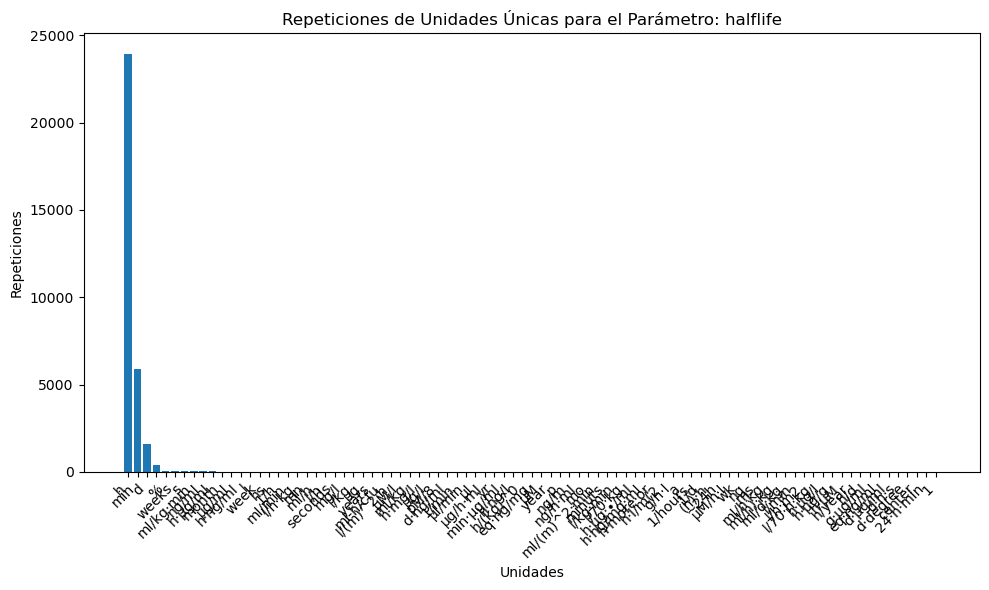

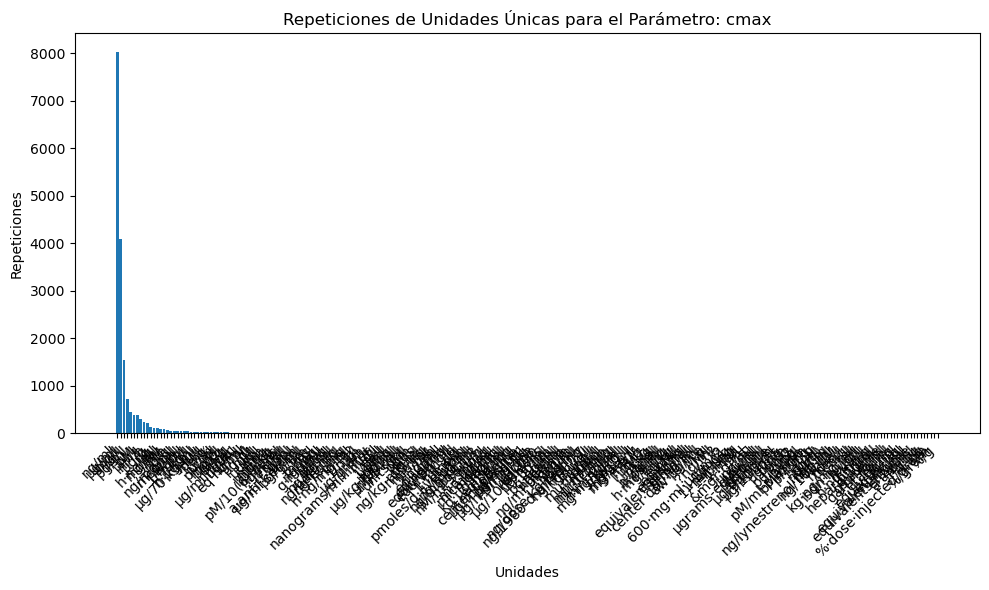

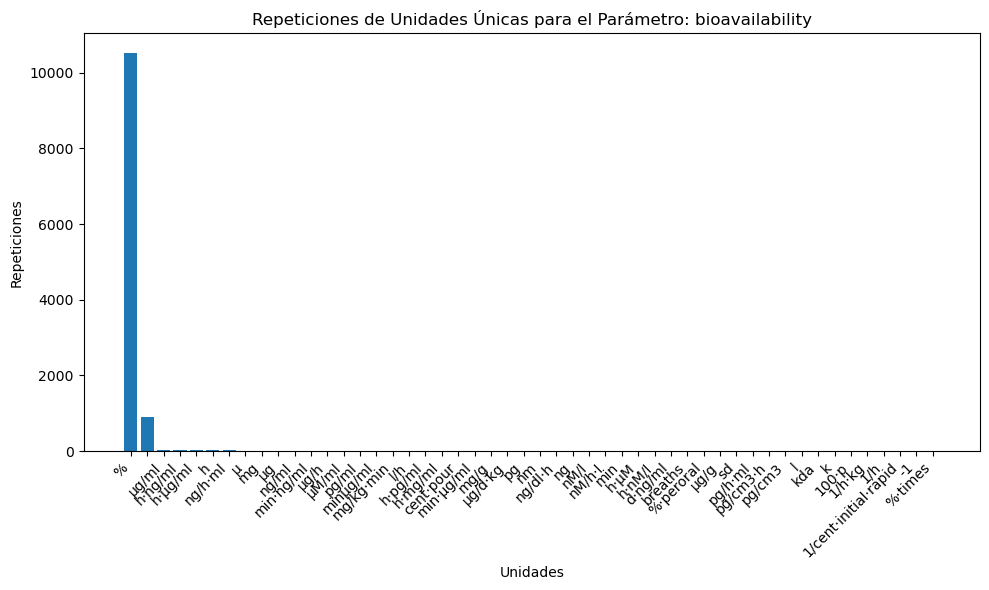

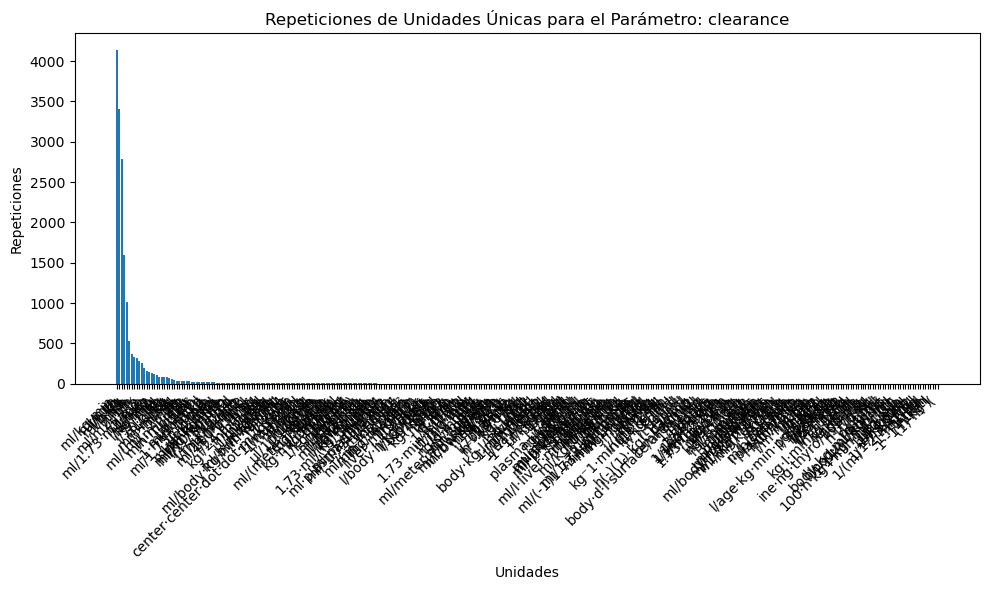

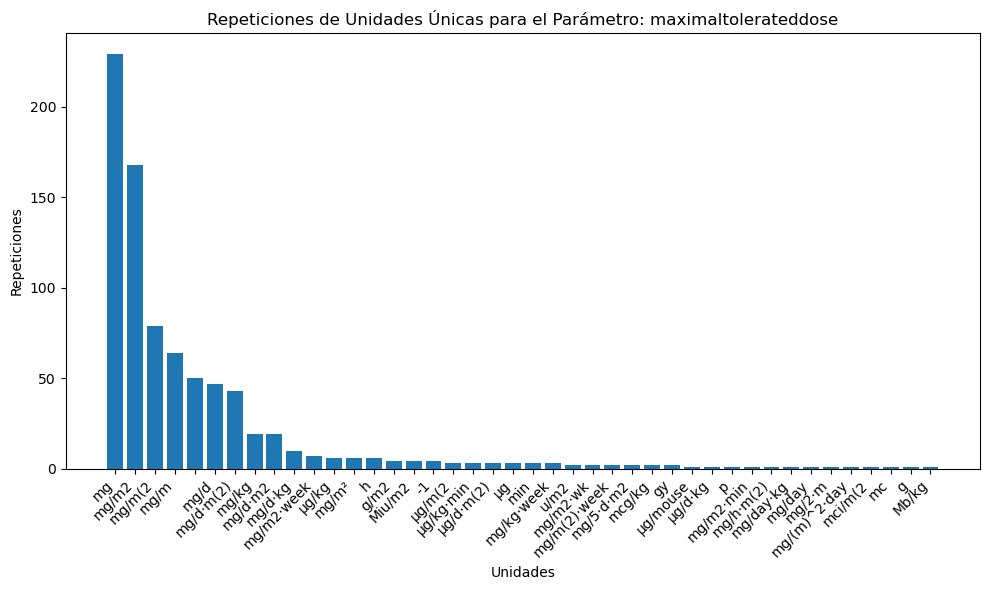

C:\Users\practicasIT\AppData\Local\Temp\ipykernel_10764\2938984913.py:46: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  plt.tight_layout()
C:\Users\practicasIT\AppData\Local\Temp\ipykernel_10764\2938984913.py:46: UserWarning: Glyph 151 (\x97) missing from current font.
  plt.tight_layout()
c:\Users\practicasIT\AppData\Local\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\practicasIT\AppData\Local\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


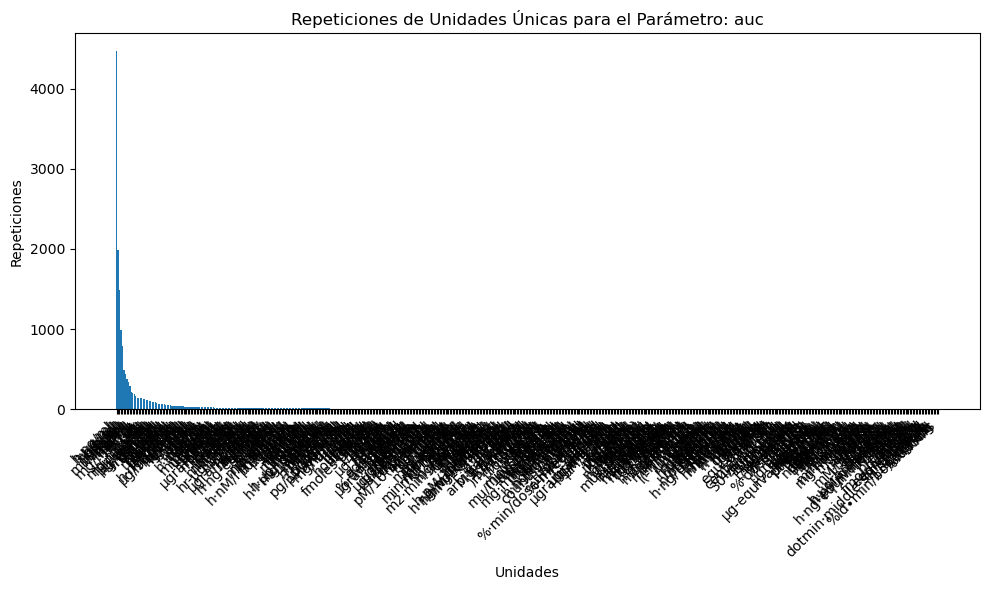

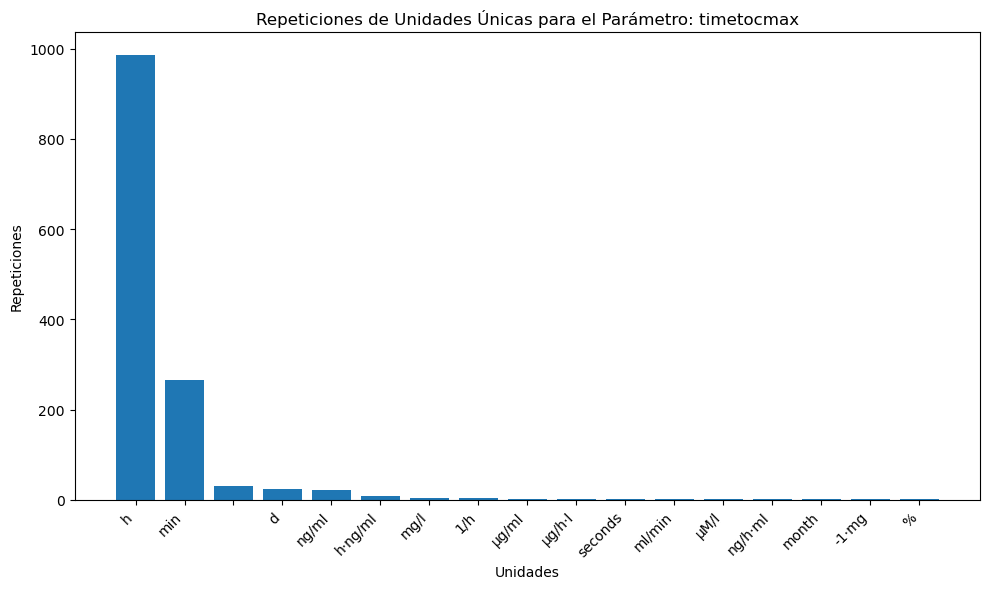

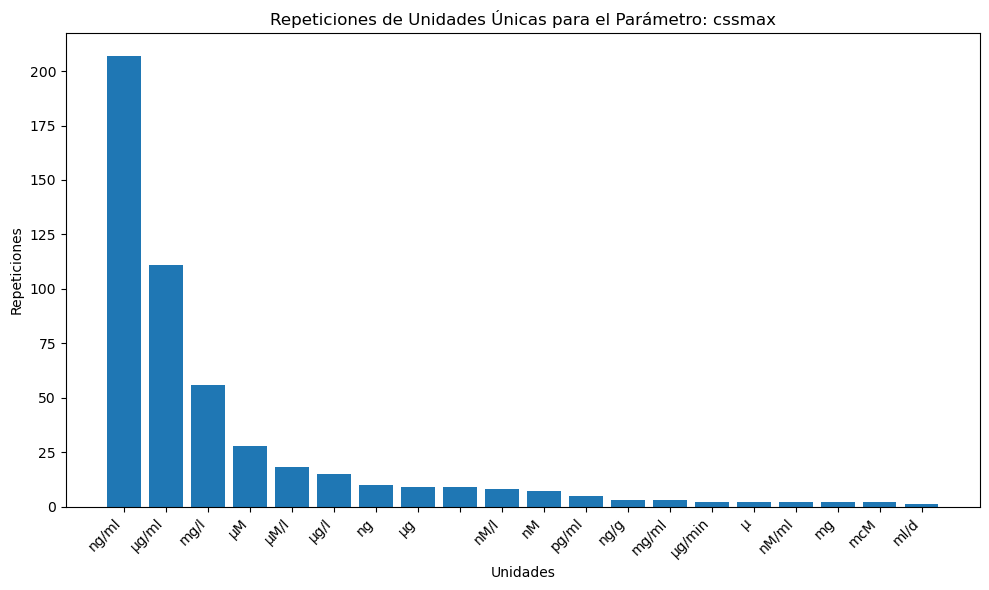

In [4]:
import sqlite3
import matplotlib.pyplot as plt

# Conectar a la base de datos SQLite
db_file = "DRUG_DB.db"  # Reemplaza con el nombre de tu archivo de base de datos
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Obtener la lista de tablas en la base de datos
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]

# Diccionario para almacenar las unidades únicas por parámetro
unique_units_by_parameter = {}

# Recorrer todas las tablas y obtener las unidades únicas para cada parámetro
for table_name in tables:
    cursor.execute(f"""SELECT DISTINCT Parameter FROM "{table_name}";""")
    for row in cursor.fetchall():
        parameter = row[0]
        query = f"""SELECT Units, COUNT(*) FROM "{table_name}" WHERE Parameter = '{parameter}' GROUP BY Units;"""
        cursor.execute(query)
        unit_counts = cursor.fetchall()
        if parameter in unique_units_by_parameter:
            for unit, count in unit_counts:
                existing_count = unique_units_by_parameter[parameter].get(unit, 0)
                unique_units_by_parameter[parameter][unit] = existing_count + count
        else:
            unique_units_by_parameter[parameter] = dict(unit_counts)

# Graficar barras verticales para cada parámetro
for parameter, unit_counts in unique_units_by_parameter.items():
    units = list(unit_counts.keys())
    counts = list(unit_counts.values())
    
    # Ordenar unidades y repeticiones de mayor a menor
    units_sorted = [unit for _, unit in sorted(zip(counts, units), reverse=True)]
    counts_sorted = sorted(counts, reverse=True)
    
    plt.figure(figsize=(10, 6))
    plt.bar(units_sorted, counts_sorted)
    plt.xlabel('Unidades')
    plt.ylabel('Repeticiones')
    plt.title(f'Repeticiones de Unidades Únicas para el Parámetro: {parameter}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Cerrar la conexión a la base de datos
conn.close()


In [14]:
!pip install reportlab

     ---------------------------------------- 1.9/1.9 MB 8.8 MB/s eta 0:00:00


In [3]:
import sqlite3
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors
from reportlab.platypus import Table, TableStyle
from io import BytesIO
import os

# Definir estilos para el documento PDF
styles = getSampleStyleSheet()

# Conectar a la base de datos SQLite
db_file = "DRUG_DB_applied.db"  # Reemplaza con el nombre de tu archivo de base de datos
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Obtener la lista de tablas en la base de datos
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]

# Diccionario para almacenar las unidades únicas por parámetro
unique_units_by_parameter = {}

# Recorrer todas las tablas y obtener las unidades únicas para cada parámetro
for table_name in tables:
    cursor.execute(f"""SELECT DISTINCT Parameter FROM "{table_name}";""")
    for row in cursor.fetchall():
        parameter = row[0]
        query = f"""SELECT Units, COUNT(*) FROM "{table_name}" WHERE Parameter = '{parameter}' GROUP BY Units;"""
        cursor.execute(query)
        unit_counts = cursor.fetchall()
        if parameter in unique_units_by_parameter:
            for unit, count in unit_counts:
                existing_count = unique_units_by_parameter[parameter].get(unit, 0)
                unique_units_by_parameter[parameter][unit] = existing_count + count
        else:
            unique_units_by_parameter[parameter] = dict(unit_counts)

# Crear un directorio para las imágenes
if not os.path.exists("images"):
    os.makedirs("images")

# Crear un documento PDF
pdf_buffer = BytesIO()
doc = SimpleDocTemplate(pdf_buffer, pagesize=letter)
elements = []

# Agregar información a cada página del PDF
for parameter, unit_counts in unique_units_by_parameter.items():
    units = list(unit_counts.keys())
    counts = list(unit_counts.values())
    
    # Ordenar unidades y repeticiones de mayor a menor
    sorted_units = [unit for _, unit in sorted(zip(counts, units), reverse=True)]
    sorted_counts = sorted(counts, reverse=True)
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_units, sorted_counts)
    plt.xlabel('Unidades')
    plt.ylabel('Repeticiones')
    plt.title(f'Repeticiones de Unidades Únicas para el Parámetro: {parameter}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Guardar la gráfica como imagen en disco
    image_path = os.path.join("images", f"{parameter}.png")
    plt.savefig(image_path, format='png')
    plt.close()
    
    # Agregar la información al PDF
    elements.append(Paragraph(f'Parámetro: {parameter}', styles['Heading1']))
    elements.append(Paragraph(f'Repeticiones de Unidades Únicas:', styles['Normal']))
    elements.append(Paragraph(f'Unidades: {sorted_units}', styles['Normal']))
    elements.append(Paragraph(f'Repeticiones: {sorted_counts}', styles['Normal']))
    elements.append(Paragraph(f'Gráfica:', styles['Normal']))
    elements.append(Image(image_path, 6*inch, 3*inch))

# Cerrar la conexión a la base de datos
conn.close()

# Construir el PDF y guardar
doc.build(elements)
pdf_buffer.seek(0)

# Guardar el PDF en un archivo
with open('report.pdf', 'wb') as pdf_file:
    pdf_file.write(pdf_buffer.read())

print("Reporte completo. El archivo PDF se encuentra en report.pdf")


C:\Users\practicasIT\AppData\Local\Temp\ipykernel_7320\916512502.py:66: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  plt.tight_layout()
C:\Users\practicasIT\AppData\Local\Temp\ipykernel_7320\916512502.py:66: UserWarning: Glyph 151 (\x97) missing from current font.
  plt.tight_layout()
C:\Users\practicasIT\AppData\Local\Temp\ipykernel_7320\916512502.py:70: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  plt.savefig(image_path, format='png')
C:\Users\practicasIT\AppData\Local\Temp\ipykernel_7320\916512502.py:70: UserWarning: Glyph 151 (\x97) missing from current font.
  plt.savefig(image_path, format='png')


Reporte completo. El archivo PDF se encuentra en report.pdf


In [5]:
import sqlite3
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors
from reportlab.platypus import Table, TableStyle
from io import BytesIO
import os
from reportlab.platypus import Image
from reportlab.lib.units import inch

# Definir estilos para el documento PDF
styles = getSampleStyleSheet()

# Conectar a la base de datos SQLite
db_file = "DRUG_DB_applied.db"  # Reemplaza con el nombre de tu archivo de base de datos
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Obtener la lista de tablas en la base de datos
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]

# Diccionario para almacenar las unidades únicas por parámetro
unique_units_by_parameter = {}

# Recorrer todas las tablas y obtener las unidades únicas para cada parámetro
for table_name in tables:
    cursor.execute(f"""SELECT DISTINCT Parameter FROM "{table_name}";""")
    for row in cursor.fetchall():
        parameter = row[0]
        query = f"""SELECT Units, COUNT(*) FROM "{table_name}" WHERE Parameter = '{parameter}' GROUP BY Units;"""
        cursor.execute(query)
        unit_counts = cursor.fetchall()
        if parameter in unique_units_by_parameter:
            for unit, count in unit_counts:
                existing_count = unique_units_by_parameter[parameter].get(unit, 0)
                unique_units_by_parameter[parameter][unit] = existing_count + count
        else:
            unique_units_by_parameter[parameter] = dict(unit_counts)

# Crear un directorio para las imágenes
if not os.path.exists("images"):
    os.makedirs("images")

# Crear un documento PDF
pdf_buffer = BytesIO()
doc = SimpleDocTemplate(pdf_buffer, pagesize=letter)
elements = []

# Agregar información a cada página del PDF
for parameter, unit_counts in unique_units_by_parameter.items():
    units = list(unit_counts.keys())
    counts = list(unit_counts.values())
    
    # Ordenar unidades y repeticiones de mayor a menor
    sorted_units = [unit for _, unit in sorted(zip(counts, units), reverse=True)]
    sorted_counts = sorted(counts, reverse=True)
    
    # Calcular el porcentaje acumulado
    total_reps = sum(sorted_counts)
    cum_percentage = [sum(sorted_counts[:i+1]) / total_reps for i in range(len(sorted_counts))]
    
    # Identificar las unidades únicas que abarcan el 95% del total de repeticiones
    units_to_highlight = [unit for unit, percentage in zip(sorted_units, cum_percentage) if percentage <= 0.95]
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_units, sorted_counts)
    
    # Resaltar en rojo las barras y/o nombres de unidades únicas que abarquen el 95% del total
    for bar, unit in zip(bars, sorted_units):
        if unit in units_to_highlight:
            bar.set_color('red')
    
    plt.xlabel('Unidades')
    plt.ylabel('Repeticiones')
    plt.title(f'Repeticiones de Unidades Únicas para el Parámetro: {parameter}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Guardar la gráfica como imagen en disco
    image_path = os.path.join("images", f"{parameter}.png")
    plt.savefig(image_path, format='png')
    plt.close()
    
    # Agregar la información al PDF
    elements.append(Paragraph(f'Parámetro: {parameter}', styles['Heading1']))
    elements.append(Paragraph(f'Repeticiones de Unidades Únicas:', styles['Normal']))
    
    # Agregar las unidades únicas y repeticiones al PDF
    for unit, count in zip(sorted_units, sorted_counts):
        unit_info = f'Unidades: {unit} - Repeticiones: {count}'
        if unit in units_to_highlight:
            unit_info = f'<font color="red">{unit_info}</font>'
        elements.append(Paragraph(unit_info, styles['Normal']))
    
    # Agregar la gráfica al PDF
    elements.append(Paragraph(f'Gráfica:', styles['Normal']))
    elements.append(Image(image_path, 6*inch, 3*inch))

# Cerrar la conexión a la base de datos
conn.close()

# Construir el PDF y guardar
doc.build(elements)
pdf_buffer.seek(0)

# Guardar el PDF en un archivo
with open('report.pdf', 'wb') as pdf_file:
    pdf_file.write(pdf_buffer.read())

print("Reporte completo. El archivo PDF se encuentra en report.pdf")


C:\Users\practicasIT\AppData\Local\Temp\ipykernel_12296\2987921110.py:81: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  plt.tight_layout()
C:\Users\practicasIT\AppData\Local\Temp\ipykernel_12296\2987921110.py:81: UserWarning: Glyph 151 (\x97) missing from current font.
  plt.tight_layout()
C:\Users\practicasIT\AppData\Local\Temp\ipykernel_12296\2987921110.py:85: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  plt.savefig(image_path, format='png')
C:\Users\practicasIT\AppData\Local\Temp\ipykernel_12296\2987921110.py:85: UserWarning: Glyph 151 (\x97) missing from current font.
  plt.savefig(image_path, format='png')


Reporte completo. El archivo PDF se encuentra en report.pdf


C:\Users\practicasIT\AppData\Local\Temp\ipykernel_12296\2443524303.py:64: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  plt.tight_layout()
C:\Users\practicasIT\AppData\Local\Temp\ipykernel_12296\2443524303.py:64: UserWarning: Glyph 151 (\x97) missing from current font.
  plt.tight_layout()


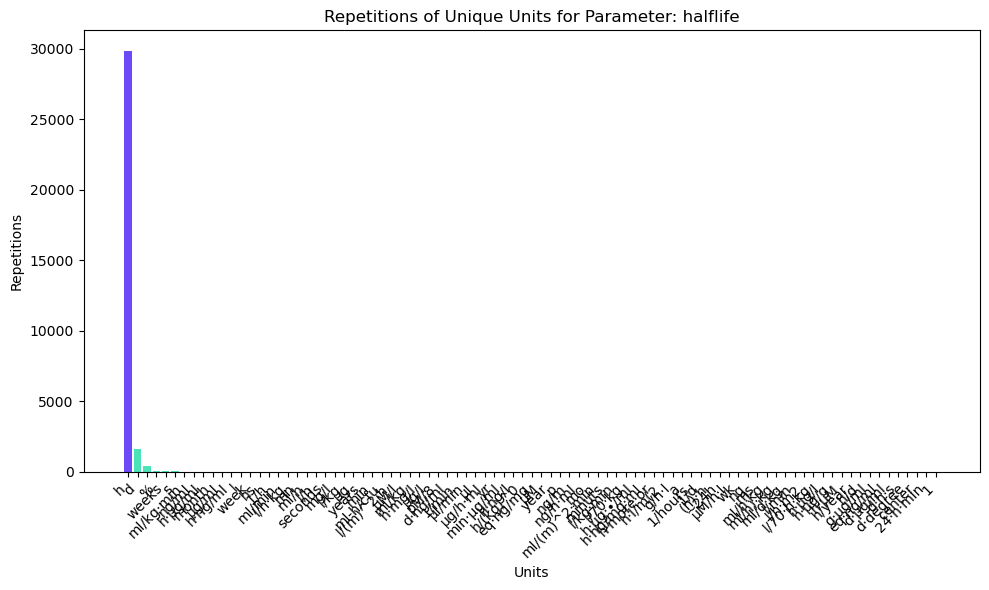

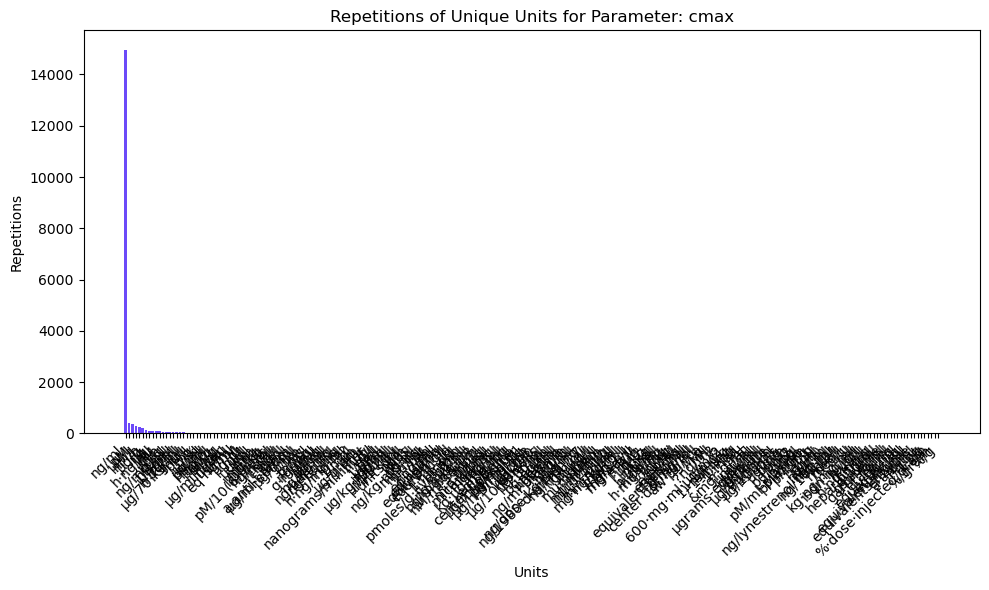

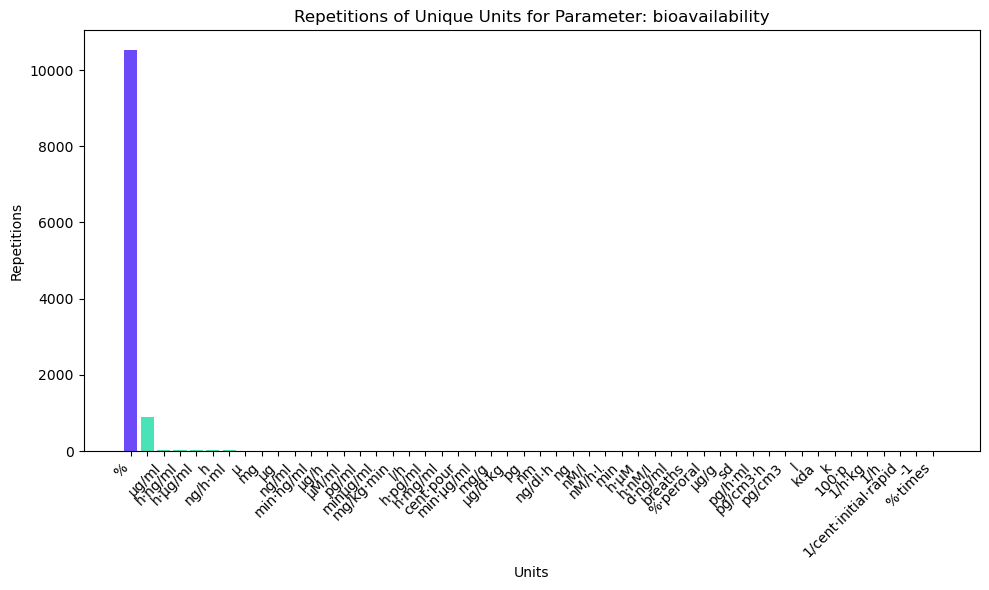

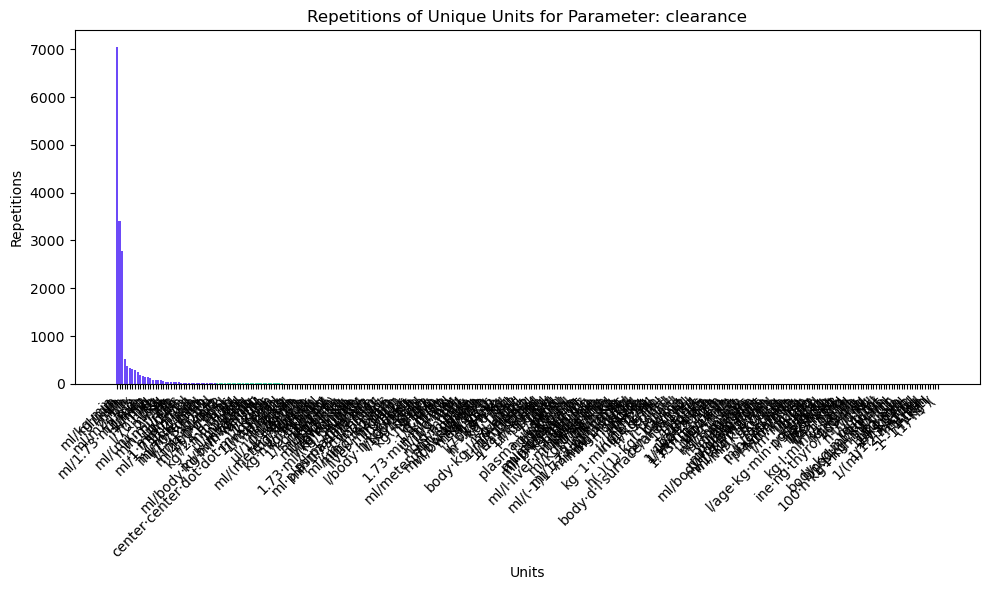

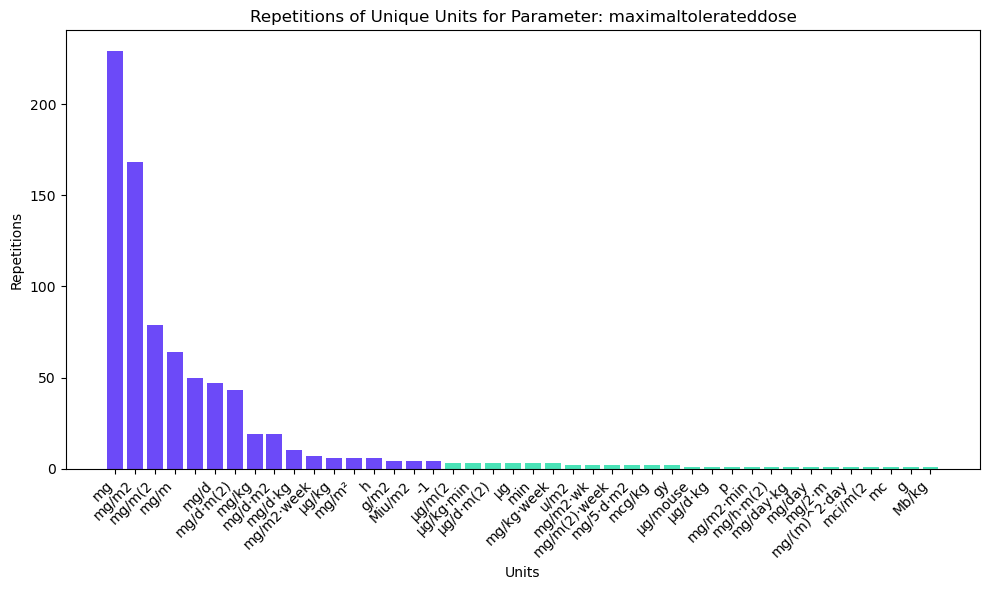

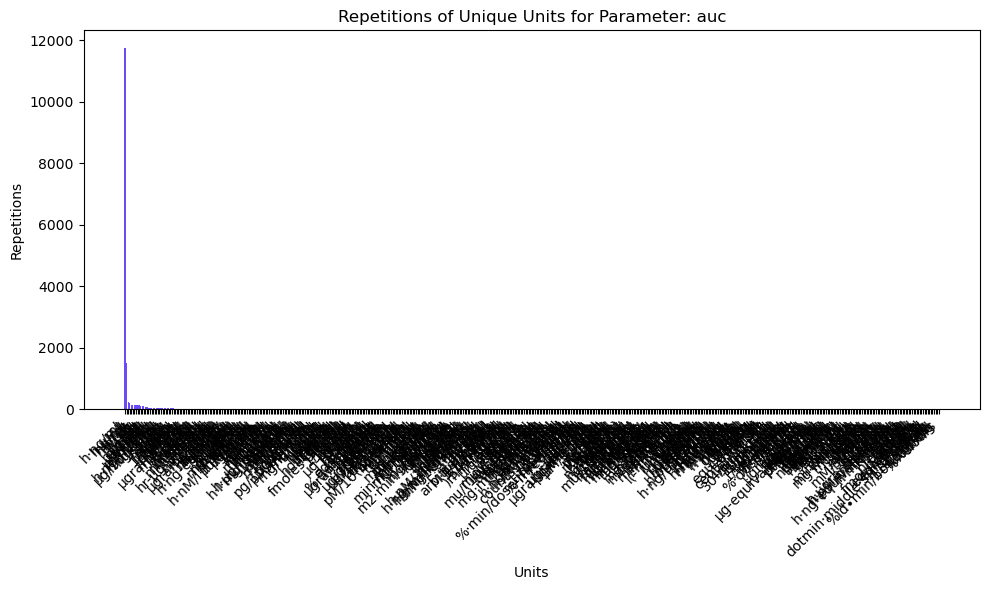

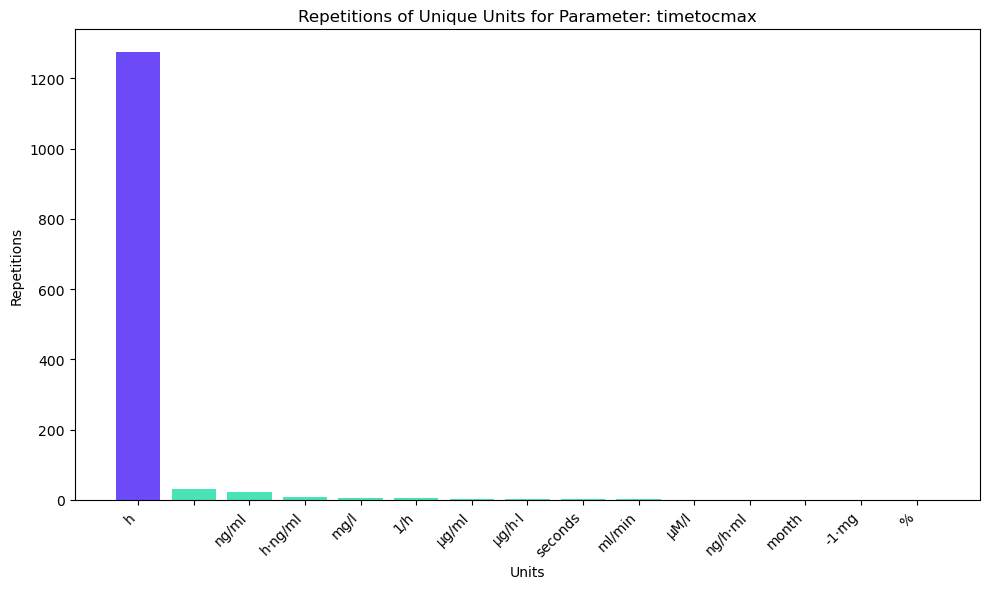

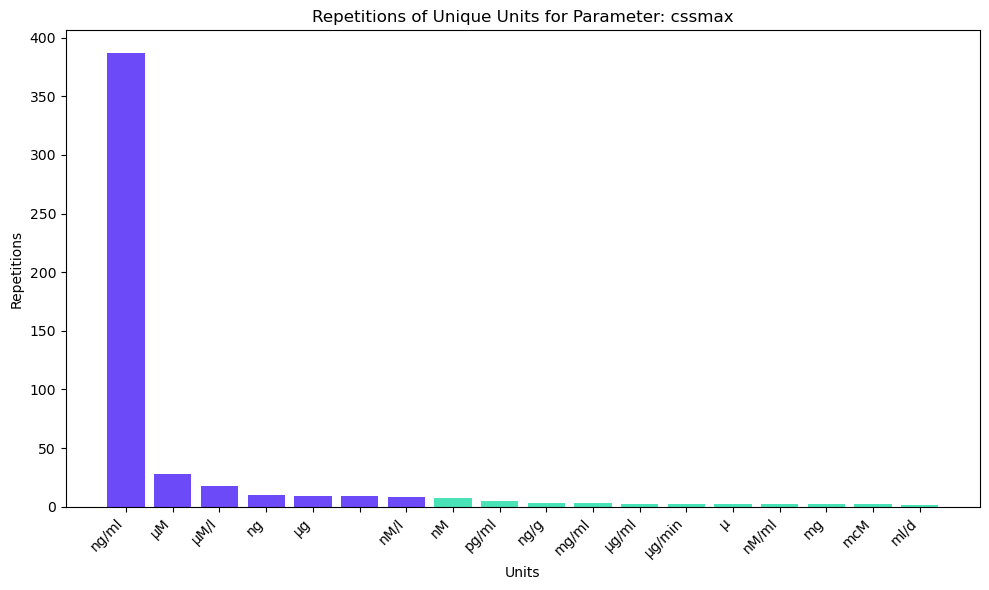

In [10]:
import sqlite3
import matplotlib.pyplot as plt
from io import BytesIO
import os

# Connect to the SQLite database
db_file = "DRUG_DB_applied.db"  # Replace with your database file name
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Get the list of tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]

# Dictionary to store unique units per parameter
unique_units_by_parameter = {}

# Iterate through all tables and get unique units for each parameter
for table_name in tables:
    cursor.execute(f"""SELECT DISTINCT Parameter FROM "{table_name}";""")
    for row in cursor.fetchall():
        parameter = row[0]
        query = f"""SELECT Units, COUNT(*) FROM "{table_name}" WHERE Parameter = '{parameter}' GROUP BY Units;"""
        cursor.execute(query)
        unit_counts = cursor.fetchall()
        if parameter in unique_units_by_parameter:
            for unit, count in unit_counts:
                existing_count = unique_units_by_parameter[parameter].get(unit, 0)
                unique_units_by_parameter[parameter][unit] = existing_count + count
        else:
            unique_units_by_parameter[parameter] = dict(unit_counts)

# Create a directory for images
if not os.path.exists("images"):
    os.makedirs("images")

# Create a PDF document
pdf_buffer = BytesIO()

# Add information to each PDF page
for parameter, unit_counts in unique_units_by_parameter.items():
    units = list(unit_counts.keys())
    counts = list(unit_counts.values())

    # Sort units and counts from highest to lowest
    sorted_units = [unit for _, unit in sorted(zip(counts, units), reverse=True)]
    sorted_counts = sorted(counts, reverse=True)

    # Calculate cumulative percentage
    total_reps = sum(sorted_counts)
    cum_percentage = [sum(sorted_counts[:i + 1]) / total_reps for i in range(len(sorted_counts))]

    # Identify unique units covering 95% of total repetitions
    units_to_highlight = [unit for unit, percentage in zip(sorted_units, cum_percentage) if percentage <= 0.95]

    # Create the bar chart with primary color #6C4AF8 and secondary color #4AE3B7
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_units, sorted_counts, color=[secondary_color if unit in units_to_highlight else main_color for unit in sorted_units])

    plt.xlabel('Units')
    plt.ylabel('Repetitions')
    plt.title(f'Repetitions of Unique Units for Parameter: {parameter}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

   

# Close the database connection
conn.close()


